In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

2024-12-17 12:03:14.596996: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 12:03:14.597735: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 12:03:14.601576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 12:03:14.611899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734415394.629816   10654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734415394.63

In [2]:
# Load Dataset
data = pd.read_csv('Electric_Production.csv')
values = data['IPG2211A2N'].values

In [3]:
# Preprocess Data
scaler = MinMaxScaler()
values_scaled = scaler.fit_transform(values.reshape(-1, 1))

In [4]:
# Sliding Window for Time Series
window_size = 30
X = np.array([values_scaled[i:i+window_size] for i in range(len(values_scaled) - window_size)])
y = np.array([values_scaled[i+window_size] for i in range(len(values_scaled) - window_size)])
X = X.reshape((X.shape[0], X.shape[1], 1))

In [5]:
# Split Dataset into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Define CNN Model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

/home/rhythm/Desktop/Machine Learning/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-17 12:03:16.376498: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1322 - mae: 0.3094 - val_loss: 0.0194 - val_mae: 0.1115
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mae: 0.1218 - val_loss: 0.0164 - val_mae: 0.1059
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mae: 0.1199 - val_loss: 0.0106 - val_mae: 0.0880
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mae: 0.1170 - val_loss: 0.0104 - val_mae: 0.0868
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mae: 0.0953 - val_loss: 0.0100 - val_mae: 0.0846
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mae: 0.1120 - val_loss: 0.0094 - val_mae: 0.0817
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mae: 0.0943 - val_loss: 0.0084 - val_mae: 0.0772
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mae: 0.0941 - val_loss: 0.0076 - val_mae: 0.0728
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mae:

In [9]:
# Evaluate on Test Set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022 - mae: 0.0347
Test Loss: 0.0021, Test MAE: 0.0344


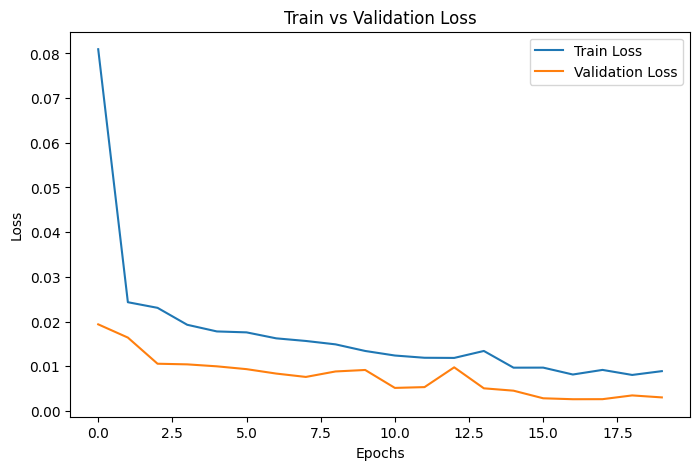

In [10]:
# Plot Train vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Predict on Test Set
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [12]:
# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

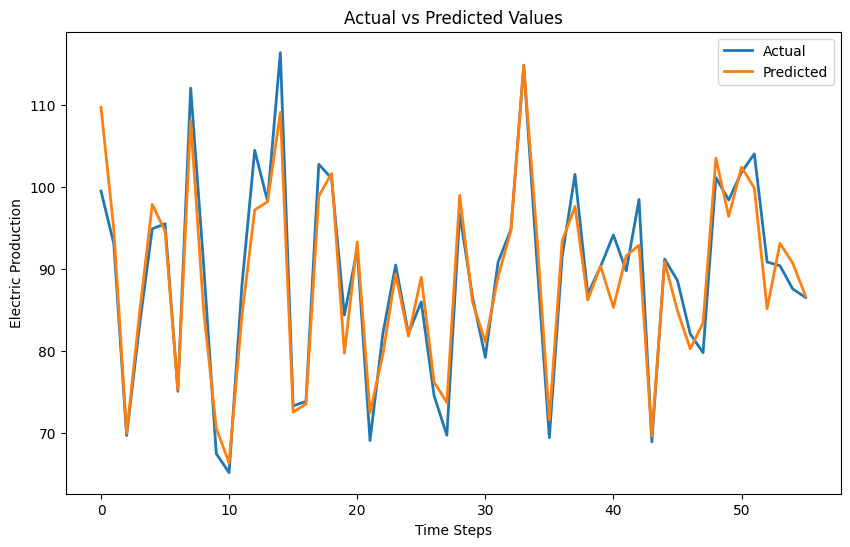

In [13]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual', linewidth=2)
plt.plot(y_pred_rescaled, label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

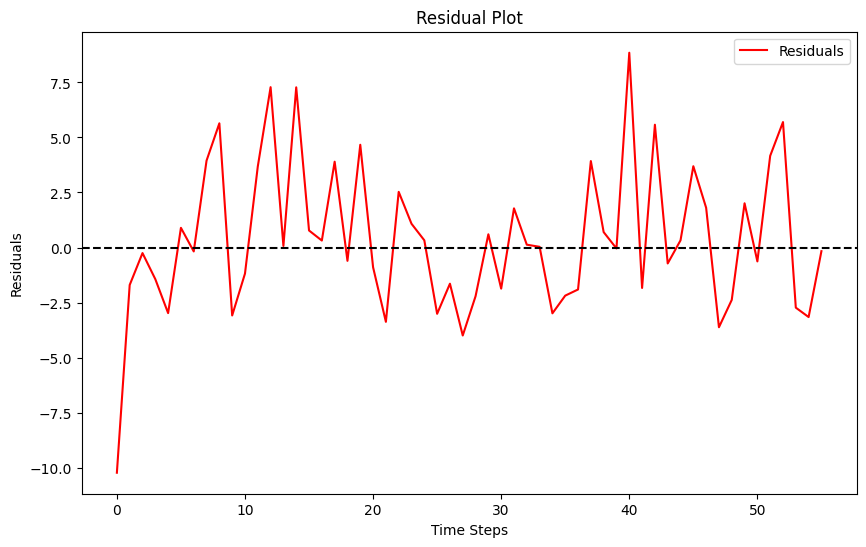

In [14]:
# Residual Plot
residuals = y_test_rescaled.flatten() - y_pred_rescaled.flatten()
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.show()